In [10]:
from sage.matrix.berlekamp_massey import berlekamp_massey
import random
from matplotlib import pyplot as plt

In [11]:
def custom_companion_matrix(poly, F):
    n = poly.degree()
    coeffs = poly.list()
    coeffs = [F(c) for c in coeffs]
    leading = coeffs[-1]
    if leading == 0:
        raise ValueError("Leading coefficient a_n must be non-zero.")
    coeffs = [c / leading for c in coeffs]
    a = coeffs[:-1]

    C = matrix(F, n, n, sparse=True)
    for i in range(n - 1):
        C[i + 1, i] = 1
    for i in range(n):
        C[i, n - 1] = -a[i]
    return C

def block_companion_matrix(poly_list, F):
    blocks = [custom_companion_matrix(f, F) for f in poly_list]
    return block_diagonal_matrix(blocks)

In [12]:
def theoretical_success(inv_factors, p):
    degrees = [f.degree() for f in inv_factors]
    gaps = [degrees[0]] + [degrees[i] - degrees[i - 1] for i in range(1, len(degrees))]
    prob = 1.0
    for gap in gaps:
        prob *= (1 - 1 / (p ** gap))
    return float(prob)

In [13]:
def random_vector(n, f):
    return vector(f, [f.random_element() for _ in range(n)])

def emperical_success(inv_factors, p, trials=1000):
    f = GF(p)
    A = block_companion_matrix(inv_factors, f)
    n = A.nrows()
    succeeded = 0
    min_poly = A.minpoly()
    
    for _ in range(trials):
        u = random_vector(n, f)
        v = random_vector(n, f)
        kappa = [u.dot_product((A^i)*v) for i in range(2*n)]
        mu = berlekamp_massey(kappa)
        if mu == min_poly:
            succeeded += 1
    prob = succeeded / trials
    return float(prob)

In [14]:
def generate_invariant_factors_divisible(p, g, k):
    if len(g) != k - 1:
        raise ValueError("Length of g must be k - 1")
    F = GF(p)
    R.<x> = PolynomialRing(F)
    degs = [randint(1, 3)]
    for gap in g:
        degs.append(degs[-1] + gap)
    f = R.irreducible_element(degs[0])
    invariant_factors = [f]
    for i in range(1, k):
        gap = degs[i] - f.degree()
        q = R.irreducible_element(gap)
        f = f * q
        invariant_factors.append(f)
    return invariant_factors

In [15]:
# p = 7
# gaps = [1, 2, 2]
# k = 4

# invs = generate_invariant_factors_divisible(p, gaps, k)
# print(invs)

## Experiment 1: Field Size

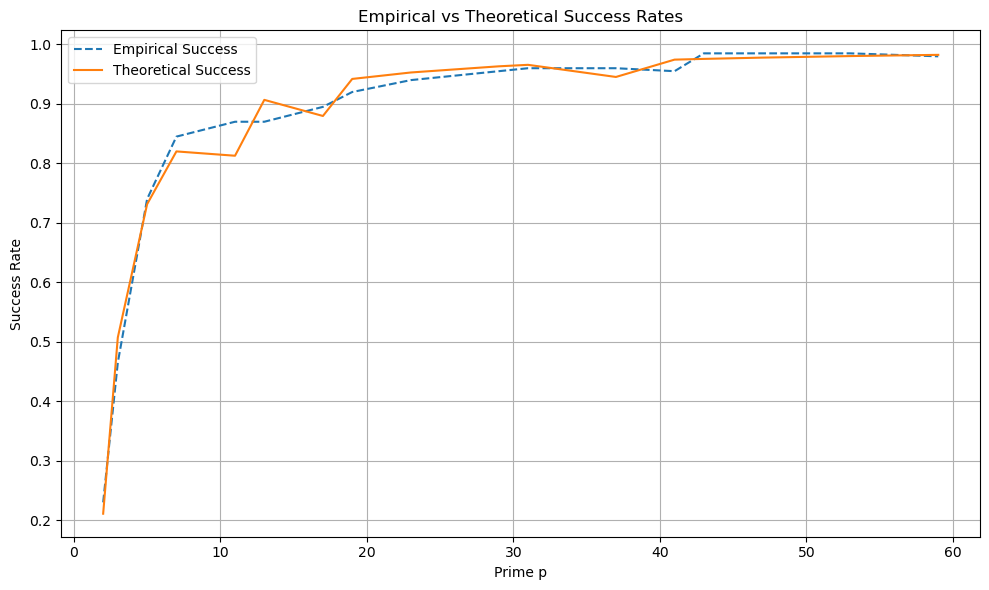

In [16]:
if __name__=='__main__':
    primes_list = prime_range(1, 60)
    em_ls = []
    th_ls = []
    gaps = [1, 2, 2]
    k = 4
    for p in primes_list:
        inv_factors = generate_invariant_factors_divisible(p, gaps, k)

        em = emperical_success(inv_factors, p, trials=200)
        th = theoretical_success(inv_factors, p)
        em_ls.append(em)
        th_ls.append(th)
        
    plt.figure(figsize=(10, 6))
    plt.plot(primes_list, em_ls, '--', label='Empirical Success')
    plt.plot(primes_list, th_ls, '-', label='Theoretical Success')
    plt.xlabel('Prime p')
    plt.ylabel('Success Rate')
    plt.title('Empirical vs Theoretical Success Rates')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Experiment 2: Number of Invariant Factors

In [ ]:
if __name__=='__main__':
    max_k = 20
    k_ls = [i for i in range(2, max_k)]
    p = 7
    em_ls = []
    th_ls = []
    for k in k_ls:
        print(k)
        gaps = [2]*(k-1)
        inv_factors = generate_invariant_factors_divisible(p, gaps, k)
        em = emperical_success(inv_factors, p, trials=200)
        th = theoretical_success(inv_factors, p)
        em_ls.append(em)
        th_ls.append(th)
        
    plt.figure(figsize=(10, 6))
    plt.plot(k_ls, em_ls, '--', label='Empirical Success')
    plt.plot(k_ls, th_ls, '-', label='Theoretical Success')
    plt.xlabel('Prime p')
    plt.ylabel('Success Rate')
    plt.title('Empirical vs Theoretical Success Rates')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Experiment 3: Varying Degree Gap

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


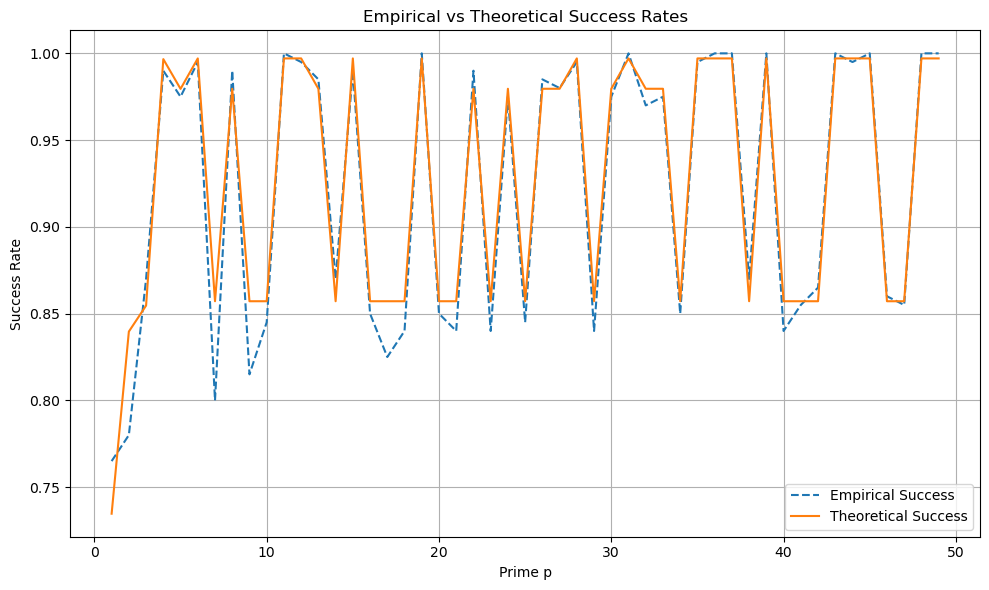

In [18]:
if __name__=='__main__':
    k = 2
    p = 7
    gap_ls = [i for i in range(1, 50)]
    em_ls = []
    th_ls = []
    for g in gap_ls:
        print(g)
        gaps = [g]
        inv_factors = generate_invariant_factors_divisible(p, gaps, k)
        em = emperical_success(inv_factors, p, trials=200)
        th = theoretical_success(inv_factors, p)
        em_ls.append(em)
        th_ls.append(th)
        
    plt.figure(figsize=(10, 6))
    plt.plot(gap_ls, em_ls, '--', label='Empirical Success')
    plt.plot(gap_ls, th_ls, '-', label='Theoretical Success')
    plt.xlabel('Prime p')
    plt.ylabel('Success Rate')
    plt.title('Empirical vs Theoretical Success Rates')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()